# Questions to answer: 
#### Hypertension VS Stroke: Is there a correlation between hypertension and the occurrence of a stroke?

#### Heart Disease VS Stroke: Does having a heart disease increase the likelihood of having a stroke?

#### Glucose Level VS Stroke: How does the average glucose level differ between stroke and non-stroke patients?

#### BMI VS Stroke: Is there a relationship between BMI (Body Mass Index) and the occurrence of strokes?


## Initial Set Up - Import Cleaned Dataset

In [1]:
%matplotlib notebook

In [2]:
#Import dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import scipy.stats as stats



In [3]:
stroke_df = pd.read_csv("Resources/healthcare-dataset-stroke-data-cleaned.csv")
stroke_df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,1,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,1,Self-employed,Rural,202.21,31.735817,never smoked,1
2,31112,Male,80.0,0,1,1,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,1,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,1,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,1,Private,Urban,83.75,33.905702,never smoked,0
5106,44873,Female,81.0,0,0,1,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,19723,Female,35.0,0,0,1,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,37544,Male,51.0,0,0,1,Private,Rural,166.29,25.600000,formerly smoked,0


# Hypertension VS Stroke

In [4]:
stroke_df['stroke_hypertension'] = np.where((stroke_df['stroke'] == 1) & (stroke_df['hypertension'] == 1), 'Stroke + Hypertension',
                                     np.where((stroke_df['stroke'] == 1) & (stroke_df['hypertension'] == 0), 'Stroke + No Hypertension',
                                              np.where((stroke_df['stroke'] == 0) & (stroke_df['hypertension'] == 1), 'No Stroke + Hypertension',
                                                       'No Stroke + No Hypertension')))
stroke_df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,stroke_hypertension
0,9046,Male,67.0,0,1,1,Private,Urban,228.69,36.600000,formerly smoked,1,Stroke + No Hypertension
1,51676,Female,61.0,0,0,1,Self-employed,Rural,202.21,31.735817,never smoked,1,Stroke + No Hypertension
2,31112,Male,80.0,0,1,1,Private,Rural,105.92,32.500000,never smoked,1,Stroke + No Hypertension
3,60182,Female,49.0,0,0,1,Private,Urban,171.23,34.400000,smokes,1,Stroke + No Hypertension
4,1665,Female,79.0,1,0,1,Self-employed,Rural,174.12,24.000000,never smoked,1,Stroke + Hypertension
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,1,Private,Urban,83.75,33.905702,never smoked,0,No Stroke + Hypertension
5106,44873,Female,81.0,0,0,1,Self-employed,Urban,125.20,40.000000,never smoked,0,No Stroke + No Hypertension
5107,19723,Female,35.0,0,0,1,Self-employed,Rural,82.99,30.600000,never smoked,0,No Stroke + No Hypertension
5108,37544,Male,51.0,0,0,1,Private,Rural,166.29,25.600000,formerly smoked,0,No Stroke + No Hypertension


In [5]:
counts_hypertension = stroke_df['stroke_hypertension'].value_counts()
counts_hypertension

No Stroke + No Hypertension    4429
No Stroke + Hypertension        432
Stroke + No Hypertension        183
Stroke + Hypertension            66
Name: stroke_hypertension, dtype: int64

<IPython.core.display.Javascript object>


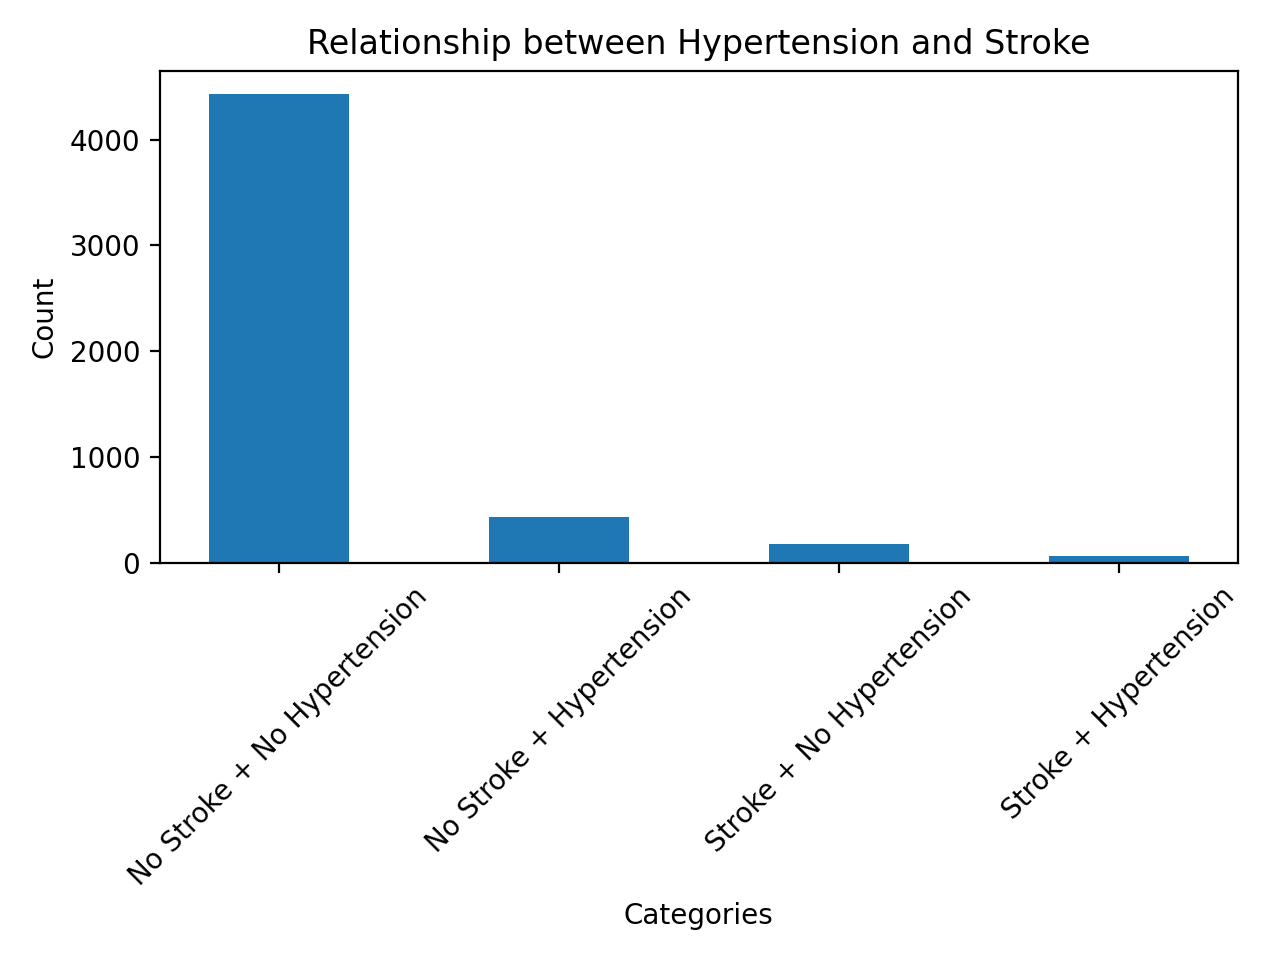

In [6]:
# Set the width of the bars
bar_width = 0.5

# Create the figure and axes
fig1, ax1 = plt.subplots()

# Plot the bars
ax1.bar(counts_hypertension.index, counts_hypertension.values, width=bar_width)

# Rotate the x-axis tick labels by 45 degrees
plt.xticks(rotation=45)

# Add labels and title
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Relationship between Hypertension and Stroke')

# Adjust the layout to prevent overlapping tick labels
plt.tight_layout()

# Display the plot
plt.savefig("Images/hypertension_stroke_bar_bad.png")
plt.show()

With the given dataset, there are significanly more people without stroke and significantly more data points without any hypertension, so a simple bar graph like this will not accurately show the relationship between hypertension and stroke. 

This leads us to investigate that GIVEN someone with or without hypertension, what are the probability of them having
stroke based on the data presented. 

In [7]:
probabilities_hypertension = stroke_df.groupby('hypertension')['stroke'].mean()
probabilities_hypertension

hypertension
0    0.039679
1    0.132530
Name: stroke, dtype: float64

<IPython.core.display.Javascript object>


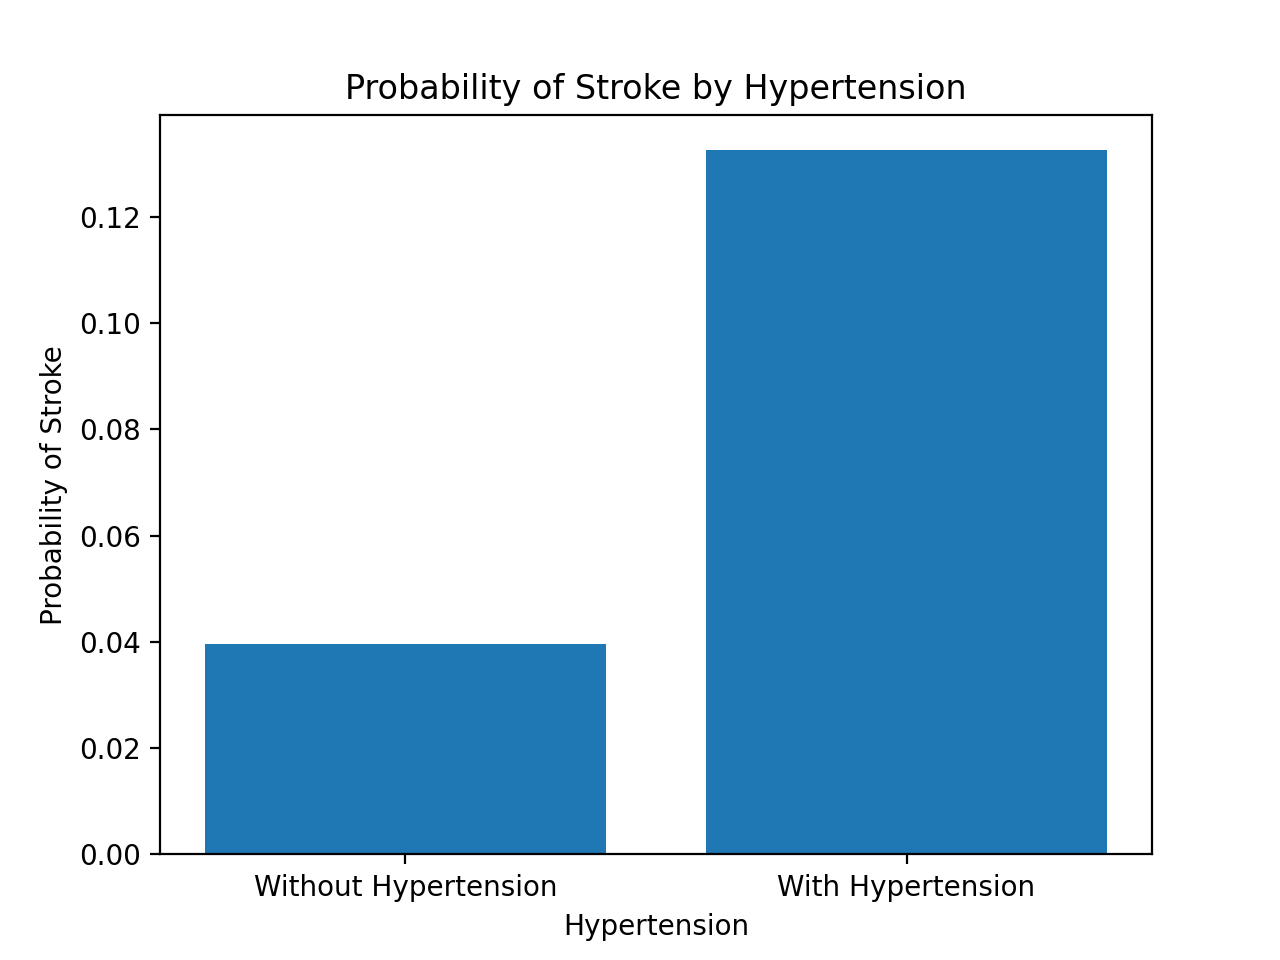

In [8]:
# Set the labels and values
labels = ['Without Hypertension', 'With Hypertension']
values = probabilities_hypertension.values

# Create the figure and axes
fig2, ax2 = plt.subplots()

# Plot the bars
ax2.bar(labels, values)

# Add labels and title
plt.xlabel('Hypertension')
plt.ylabel('Probability of Stroke')
plt.title('Probability of Stroke by Hypertension')

# Display the plot
plt.savefig("Images/hypertension_stroke_boxplot.png")
plt.show()

In [9]:
# Create a contingency table of hypertension and stroke
contingency_table_hypertension = pd.crosstab(stroke_df['hypertension'], stroke_df['stroke'])

# Perform the chi-square test for independence
chi2, p_value, _, _ = stats.chi2_contingency(contingency_table_hypertension)

# Print the results
print("Chi-square test statistic:", chi2)
print("p-value:", p_value)

Chi-square test statistic: 81.6053682482931
p-value: 1.661621901511823e-19


A p-value of 1.661621901511823e-19 is very small and much less than the 0.05 significance level. This indicate that the probablity of stroke is greater in an individual with hypertension than one without.

# Heart Disease VS Stroke
Does having a heart disease increase the likelihood of having a stroke?


In [10]:
stroke_df['stroke_heartdisease'] = np.where((stroke_df['stroke'] == 1) & (stroke_df['heart_disease'] == 1), 'Stroke + Heart Disease',
                                     np.where((stroke_df['stroke'] == 1) & (stroke_df['heart_disease'] == 0), 'Stroke + No Heart Disease',
                                              np.where((stroke_df['stroke'] == 0) & (stroke_df['heart_disease'] == 1), 'No stroke + Heart Disease',
                                                       'No Stroke + No Heart Disease')))
stroke_df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,stroke_hypertension,stroke_heartdisease
0,9046,Male,67.0,0,1,1,Private,Urban,228.69,36.600000,formerly smoked,1,Stroke + No Hypertension,Stroke + Heart Disease
1,51676,Female,61.0,0,0,1,Self-employed,Rural,202.21,31.735817,never smoked,1,Stroke + No Hypertension,Stroke + No Heart Disease
2,31112,Male,80.0,0,1,1,Private,Rural,105.92,32.500000,never smoked,1,Stroke + No Hypertension,Stroke + Heart Disease
3,60182,Female,49.0,0,0,1,Private,Urban,171.23,34.400000,smokes,1,Stroke + No Hypertension,Stroke + No Heart Disease
4,1665,Female,79.0,1,0,1,Self-employed,Rural,174.12,24.000000,never smoked,1,Stroke + Hypertension,Stroke + No Heart Disease
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,1,Private,Urban,83.75,33.905702,never smoked,0,No Stroke + Hypertension,No Stroke + No Heart Disease
5106,44873,Female,81.0,0,0,1,Self-employed,Urban,125.20,40.000000,never smoked,0,No Stroke + No Hypertension,No Stroke + No Heart Disease
5107,19723,Female,35.0,0,0,1,Self-employed,Rural,82.99,30.600000,never smoked,0,No Stroke + No Hypertension,No Stroke + No Heart Disease
5108,37544,Male,51.0,0,0,1,Private,Rural,166.29,25.600000,formerly smoked,0,No Stroke + No Hypertension,No Stroke + No Heart Disease


In [11]:
counts_heartdisease = stroke_df['stroke_heartdisease'].value_counts()
counts_heartdisease

No Stroke + No Heart Disease    4632
No stroke + Heart Disease        229
Stroke + No Heart Disease        202
Stroke + Heart Disease            47
Name: stroke_heartdisease, dtype: int64

<IPython.core.display.Javascript object>


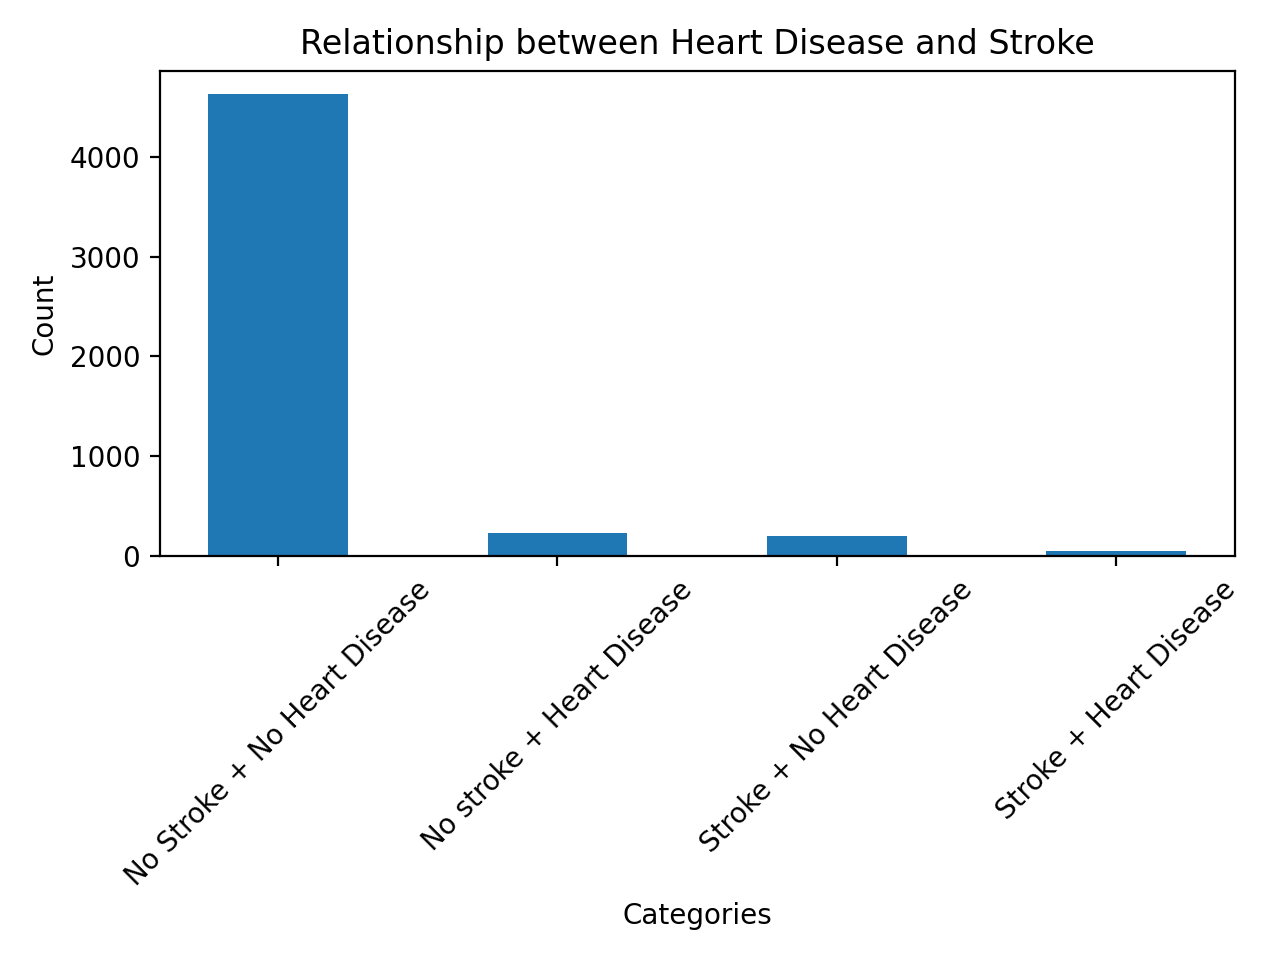

In [12]:
# Set the width of the bars
bar_width = 0.5

# Create the figure and axes
fig3, ax3 = plt.subplots()

# Plot the bars
ax3.bar(counts_heartdisease.index, counts_heartdisease.values, width=bar_width)

# Rotate the x-axis tick labels by 45 degrees
plt.xticks(rotation=45)

# Add labels and title
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Relationship between Heart Disease and Stroke')

# Adjust the layout to prevent overlapping tick labels
plt.tight_layout()

# Display the plot
plt.savefig("Images/heartdisease_stroke_bar_bad.png")
plt.show()

Again with the given dataset, there are significanly more people without stroke and without heart disease, so 
a simple bar graph like this will not accurately show the relationship between heart disease and stroke. 

This leads us to investigate that GIVEN someone with or without heart disease, what are the probability of them having
stroke based on the data presented. 

In [13]:
probabilities_heartdisease = stroke_df.groupby('heart_disease')['stroke'].mean()
probabilities_heartdisease

heart_disease
0    0.041787
1    0.170290
Name: stroke, dtype: float64

<IPython.core.display.Javascript object>


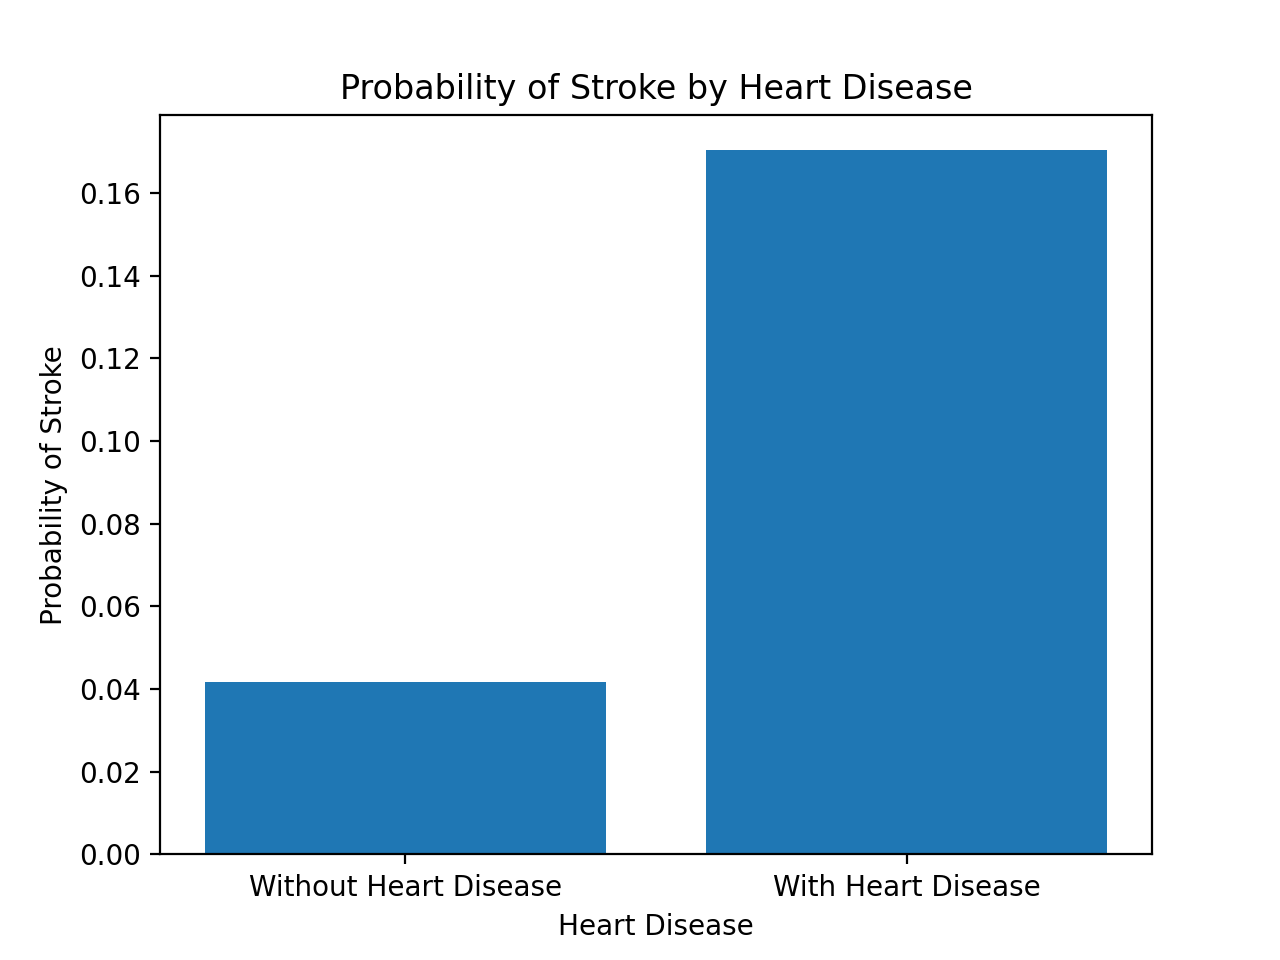

In [14]:
# Set the labels and values
labels = ['Without Heart Disease', 'With Heart Disease']
values = probabilities_heartdisease.values

# Create the figure and axes
fig4, ax4 = plt.subplots()

# Plot the bars
ax4.bar(labels, values)

# Add labels and title
plt.xlabel('Heart Disease')
plt.ylabel('Probability of Stroke')
plt.title('Probability of Stroke by Heart Disease')

# Display the plot
plt.savefig("Images/heartdisease_stroke_bar.png")
plt.show()

In [15]:
# Create a contingency table of hypertension and stroke
contingency_table_heartdisease = pd.crosstab(stroke_df['heart_disease'], stroke_df['stroke'])

# Perform the chi-square test for independence
chi2, p_value, _, _ = stats.chi2_contingency(contingency_table_heartdisease)

# Print the results
print("Chi-square test statistic:", chi2)
print("p-value:", p_value)

Chi-square test statistic: 90.25956125843324
p-value: 2.0887845685229236e-21


A p-value of 2.0887845685229236e-21 is very small and much less than the 0.05 significance level. This indicate that the probablity of stroke is greater in an individual with heart disease than one without.

# Glucose Level VS Stroke:
How does the average glucose level differ between stroke and non-stroke patients?


<IPython.core.display.Javascript object>


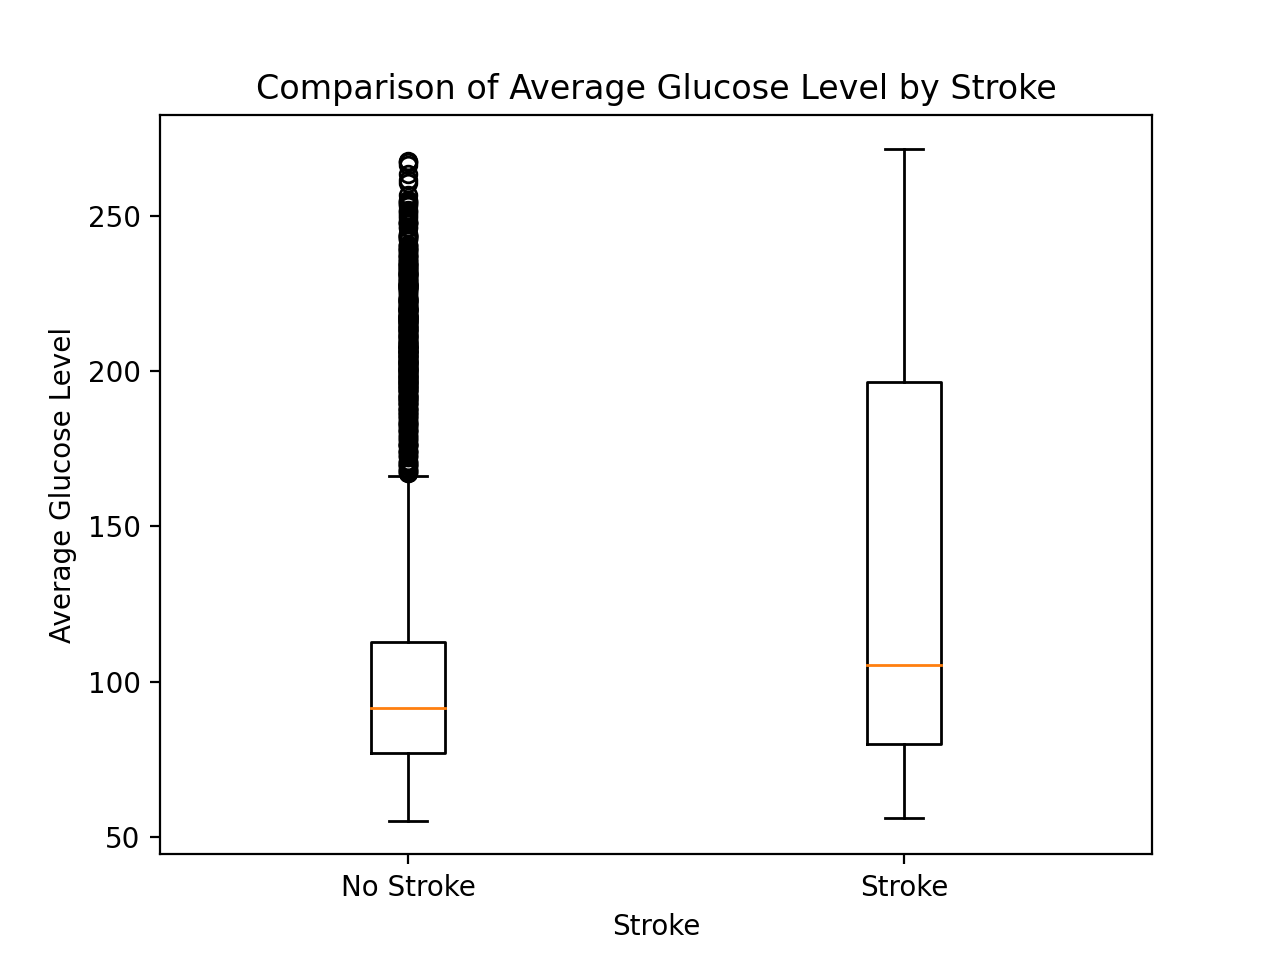

In [16]:
# Split the data into stroke and no stroke groups
glucose_stroke = stroke_df[stroke_df['stroke'] == 1]['avg_glucose_level']
glucose_no_stroke = stroke_df[stroke_df['stroke'] == 0]['avg_glucose_level']
#print(glucose_stroke)
# Create the figure and axes
fig5, ax5 = plt.subplots()

ax5.boxplot([glucose_no_stroke, glucose_stroke], labels=['No Stroke', 'Stroke'])

# Add labels and title
plt.xlabel('Stroke')
plt.ylabel('Average Glucose Level')
plt.title('Comparison of Average Glucose Level by Stroke')

# Display the plot
plt.savefig("Images/glucose_stroke_boxplot.png")
plt.show()

In [17]:
# Perform the independent samples t-test
t_statistic, p_value = stats.ttest_ind(glucose_stroke, glucose_no_stroke)

# Print the results
print("Independent Samples t-test:")
print("t-statistic:", t_statistic)
print("p-value:", p_value)
#print(glucose_stroke)

Independent Samples t-test:
t-statistic: 9.513352175431471
p-value: 2.7678105194741054e-21


The p-value of 2.7678105194741054e-21 which very small, this means that there is a significant difference between the median glucose level of those with stroke and the median glucose level of those without. Also, the average glucose level for those with stroke is very right skewed, indicating a more people with stroke have the lower end of the glucose level. 

# BMI VS Stroke
Is there a relationship between BMI (Body Mass Index) and the occurrence of strokes?


<IPython.core.display.Javascript object>


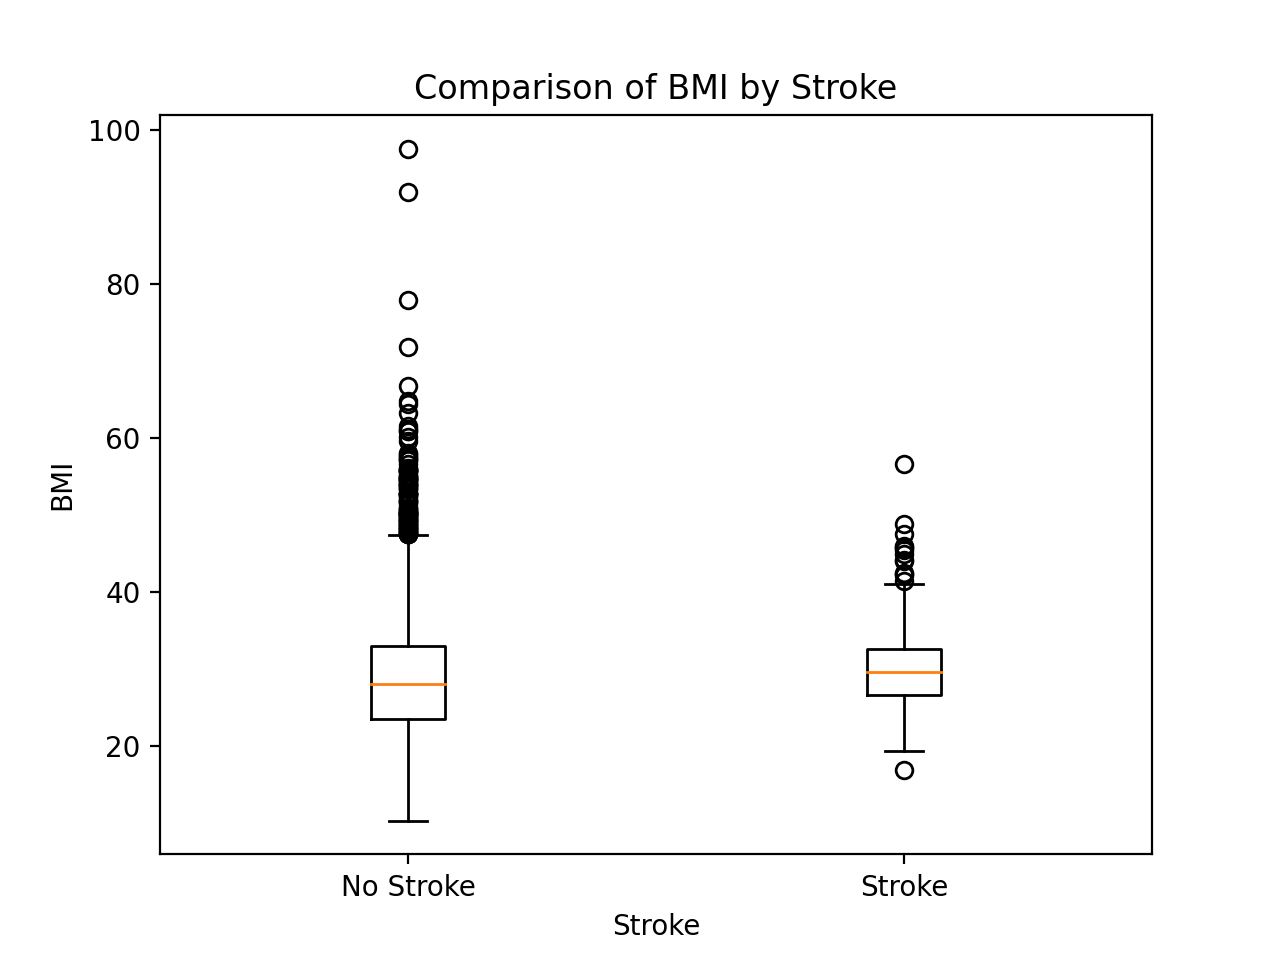

In [18]:
# Split the data into stroke and no stroke groups
bmi_stroke = stroke_df[stroke_df['stroke'] == 1]['bmi']
bmi_no_stroke = stroke_df[stroke_df['stroke'] == 0]['bmi']
# Create the figure and axes
fig6, ax6 = plt.subplots()

ax6.boxplot([bmi_no_stroke, bmi_stroke], labels=['No Stroke', 'Stroke'])

# Add labels and title
plt.xlabel('Stroke')
plt.ylabel('BMI')
plt.title('Comparison of BMI by Stroke')

# Display the plot
plt.savefig("Images/bmi_stroke_boxplot.png")
plt.show()

In [19]:
# Perform the independent samples t-test
t_statistic, p_value = stats.ttest_ind(bmi_stroke, bmi_no_stroke)

# Print the results
print("Independent Samples t-test:")
print("t-statistic:", t_statistic)
print("p-value:", p_value)


Independent Samples t-test:
t-statistic: 2.758251840728092
p-value: 0.005831817383508352


The p-value of 0.005831817383508352 is less than the significant level of 0.05, therefore, the difference in the median bmi between the two groups: stroke and no stroke is significant.